In [121]:
#demonstrate rip channel current analysis with depth and risk model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import math
import glob
import os 

2.15.0


In [122]:
#setup
start = time.time()

#image folder set up
imagePrefix='DFD1_gimbal0_'
imageSuffix='.png'
pathImage='../scout_video_09/'
filePrefix='gimbal0_'
fileSuffix='.jpg'

#analysis setup
tileSpan=15
dimX=1920
dimY=1080
searchRange=10
searchStep=1
windowSpanX=20
windowSpanY=20
windowShiftX=30
windowShiftY=30

#compensation parameters
speedY=5 #m/s
frameRate=10 #Hz
pixelSize=0.1 #m
compensateY= speedY / frameRate / pixelSize

#Rip current analysis set up
ripNoImages=3
ripNoRowWindow=10 #windowSpanY and windowShiftY

../scout_video_09/gimbal0_2000.jpg
0.00390625
0.99609375
(1080, 1920, 3)
0.2890625
<class 'numpy.float64'>


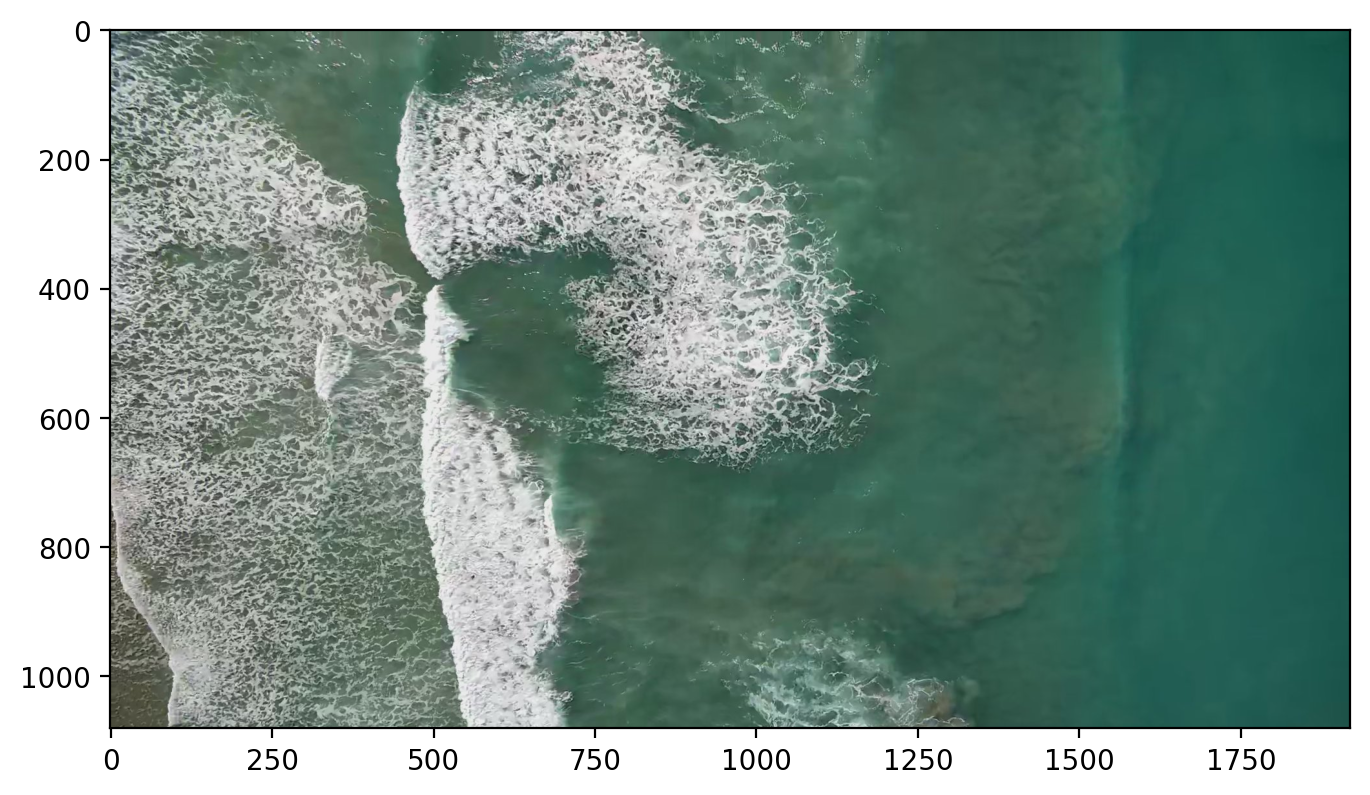

../scout_video_09/gimbal0_2001.jpg


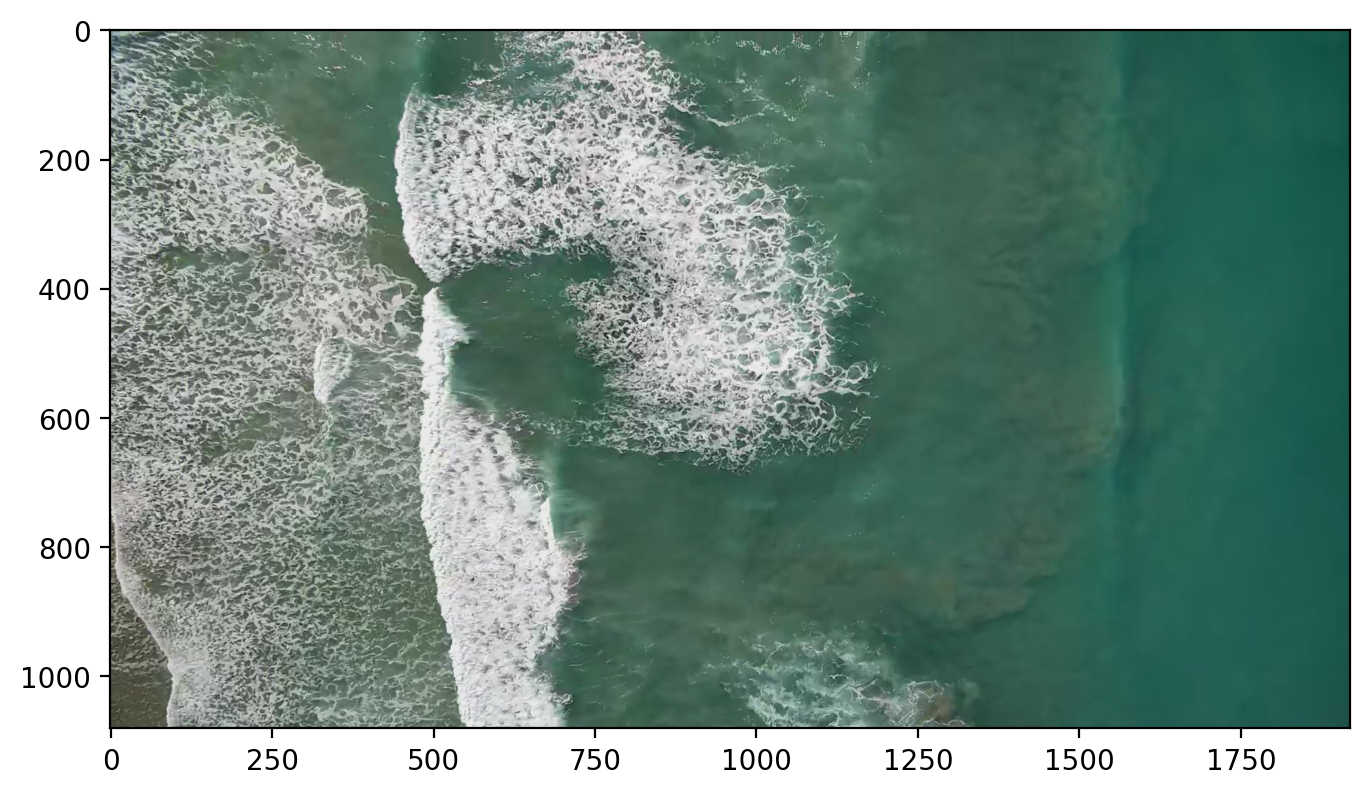

In [123]:
#display example images
idxFile=0
idxStart=2000

#display two images
f=plt.figure(dpi=200)
f.set_figwidth(8)
f.set_figheight(12)
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
print(pathImage + filename)
img_0 = mpimg.imread(pathImage + filename) / 256

print(np.min(img_0))
print(np.max(img_0))
print(img_0.shape)
print(img_0[1079,1919,2])
print(type(img_0[0,0,0]))

imgplot_0 = plt.imshow(img_0)
plt.show()

f=plt.figure(dpi=200)
f.set_figwidth(8)
f.set_figheight(12)
filename=filePrefix + str(idxFile + idxStart + 1) + fileSuffix
print(pathImage + filename)
img_0 = mpimg.imread(pathImage + filename) / 256
imgplot_0 = plt.imshow(img_0)
plt.show()

In [124]:
#for an example, load DFD results
n=2000
m=0
#DFD=np.load(pathImage + filePrefix +"DFD_" + str(n + m) + ".npy")
DFDx=np.load(pathImage + filePrefix +"DFDx_" + str(n + m) + ".npy")
DFDy=np.load(pathImage + filePrefix +"DFDy_" + str(n + m) + ".npy")

(DFDheight,DFDwidth)=DFDx.shape
print(DFDheight, DFDwidth)

1030 1870


In [125]:
#examine data set
count=0
for x in range(windowSpanX, DFDwidth-windowSpanX+1, windowShiftX ):
    count+=1
print("X count: ", count)
print("last x:" , x)
count=0
for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
    count+=1
print("Y count: ", count)
print("last y:" , y)

print((DFDwidth-windowSpanX*2)/windowShiftX)
print((DFDheight-windowSpanY*2)/windowShiftY)
svSx=int((DFDwidth-windowSpanX*2)/windowShiftX)
svSy=int((DFDheight-windowSpanY*2)/windowShiftY)

#Initialize Averaged DFD vector matrix
vectorSampleX=np.zeros((svSy+1, svSx+1))
vectorSampleY=np.zeros((svSy+1, svSx+1))

X count:  62
last x: 1850
Y count:  34
last y: 1010
61.0
33.0


34 62


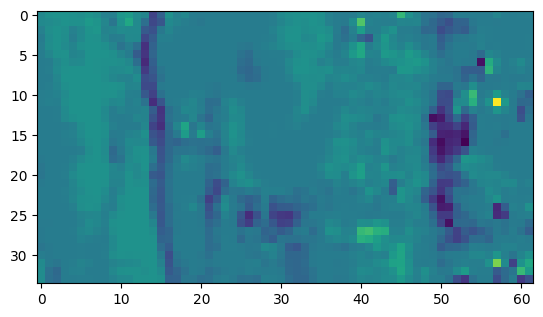

In [126]:
#examine data set
listImage=[]
listVector=[]
n=2000
for m in range(0,ripNoImages):
    #load DFD vector data
    DFDx=np.load(pathImage + filePrefix +"DFDx_" + str(n + m) + ".npy")
    DFDy=np.load(pathImage + filePrefix +"DFDy_" + str(n + m) + ".npy")
    
    (DFDheight,DFDwidth)=DFDx.shape
    idxX=0 
    for x in range(windowSpanX, DFDwidth-windowSpanX+1, windowShiftX ):
        idxY=0
        for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
            vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
            vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
            vectorSampleX[idxY,idxX]=vX
            vectorSampleY[idxY,idxX]=vY
            idxY+=1
        idxX+=1
#
imgplot_1 = plt.imshow(vectorSampleX)
#imgplot_2 = plt.imshow(vectorSampleY)
print(idxY, idxX)

In [127]:
#ocean depth adn risk model matrix
oceanDepthShallow=0.1
oceanDepthDeep=1
oceanDepthSlice=np.arange(oceanDepthShallow, oceanDepthDeep, (oceanDepthDeep-oceanDepthShallow)/(svSx+1))
print(oceanDepthSlice.shape)
print(oceanDepthSlice)

oceanDepthMatrix=np.repeat([oceanDepthSlice], ripNoRowWindow, axis=0)
print(oceanDepthMatrix.shape)
print(oceanDepthMatrix)

(62,)
[0.1        0.11451613 0.12903226 0.14354839 0.15806452 0.17258065
 0.18709677 0.2016129  0.21612903 0.23064516 0.24516129 0.25967742
 0.27419355 0.28870968 0.30322581 0.31774194 0.33225806 0.34677419
 0.36129032 0.37580645 0.39032258 0.40483871 0.41935484 0.43387097
 0.4483871  0.46290323 0.47741935 0.49193548 0.50645161 0.52096774
 0.53548387 0.55       0.56451613 0.57903226 0.59354839 0.60806452
 0.62258065 0.63709677 0.6516129  0.66612903 0.68064516 0.69516129
 0.70967742 0.72419355 0.73870968 0.75322581 0.76774194 0.78225806
 0.79677419 0.81129032 0.82580645 0.84032258 0.85483871 0.86935484
 0.88387097 0.8983871  0.91290323 0.92741935 0.94193548 0.95645161
 0.97096774 0.98548387]
(10, 62)
[[0.1        0.11451613 0.12903226 0.14354839 0.15806452 0.17258065
  0.18709677 0.2016129  0.21612903 0.23064516 0.24516129 0.25967742
  0.27419355 0.28870968 0.30322581 0.31774194 0.33225806 0.34677419
  0.36129032 0.37580645 0.39032258 0.40483871 0.41935484 0.43387097
  0.4483871  0.4629

(34, 62)
[[ 0.03106036]
 [ 0.02872982]
 [ 0.04258357]
 [ 0.04233211]
 [ 0.02560369]
 [ 0.00403904]
 [-0.02192671]
 [-0.04881503]
 [-0.06748481]
 [-0.06826407]
 [-0.06695221]
 [-0.06616853]
 [-0.08455422]
 [-0.0889507 ]
 [-0.08393251]
 [-0.09026409]
 [-0.09995225]
 [-0.09774713]
 [-0.09120144]
 [-0.09561943]
 [-0.10135681]
 [-0.09853151]
 [-0.0802563 ]
 [-0.06170269]
 [-0.0664048 ]]
25


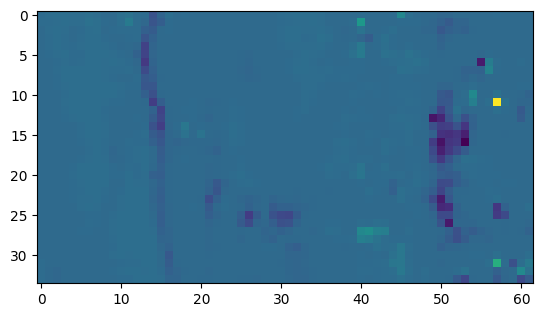

In [128]:
#amplify stronger vectors with squaring
#vXabs=np.abs(vectorSampleX)
#vectorInputX=np.multiply(vectorSampleX,vXabs)
vectorInputX=vectorSampleX
print(vXsqr.shape)
imgplot_1 = plt.imshow(vXsqr)

#this is straight sum of x vector as rip current flow
ripValue=np.zeros((svSy-ripNoRowWindow+2,1))
for k in range(0,int(svSy)-ripNoRowWindow+2):
    tV=np.mean(vectorInputX[k:k+ripNoRowWindow,:])
    ripValue[k]=tV

#linear ocean depth model based rip current flow
oceanDepthShallow=0.1
oceanDepthDeep=1
oceanDepthSlice=np.arange(oceanDepthShallow, oceanDepthDeep, (oceanDepthDeep-oceanDepthShallow)/(svSx+1))
oceanDepthMatrix=np.repeat([oceanDepthSlice], ripNoRowWindow, axis=0)
ripDepth=np.zeros((svSy-ripNoRowWindow+2,1))
for k in range(0,int(svSy)-ripNoRowWindow+2):
    tV=np.mean( np.multiply( vectorInputX[k:k+ripNoRowWindow,:], oceanDepthMatrix) )
    ripDepth[k]=tV

#quadratic ocean risk model based rip current flow
oceanRiskSlice=np.multiply(oceanDepthSlice, oceanDepthSlice)
oceanRiskMatrix=np.multiply(oceanDepthMatrix, oceanDepthMatrix)
ripRisk=np.zeros((svSy-ripNoRowWindow+2,1))
for k in range(0,int(svSy)-ripNoRowWindow+2):
    tV=np.mean( np.multiply( vectorInputX[k:k+ripNoRowWindow,:], oceanRiskMatrix) )
    ripRisk[k]=tV

print(ripRisk)
print(len(ripRisk))
#rint(k+ripNoRowWindow)

24
24


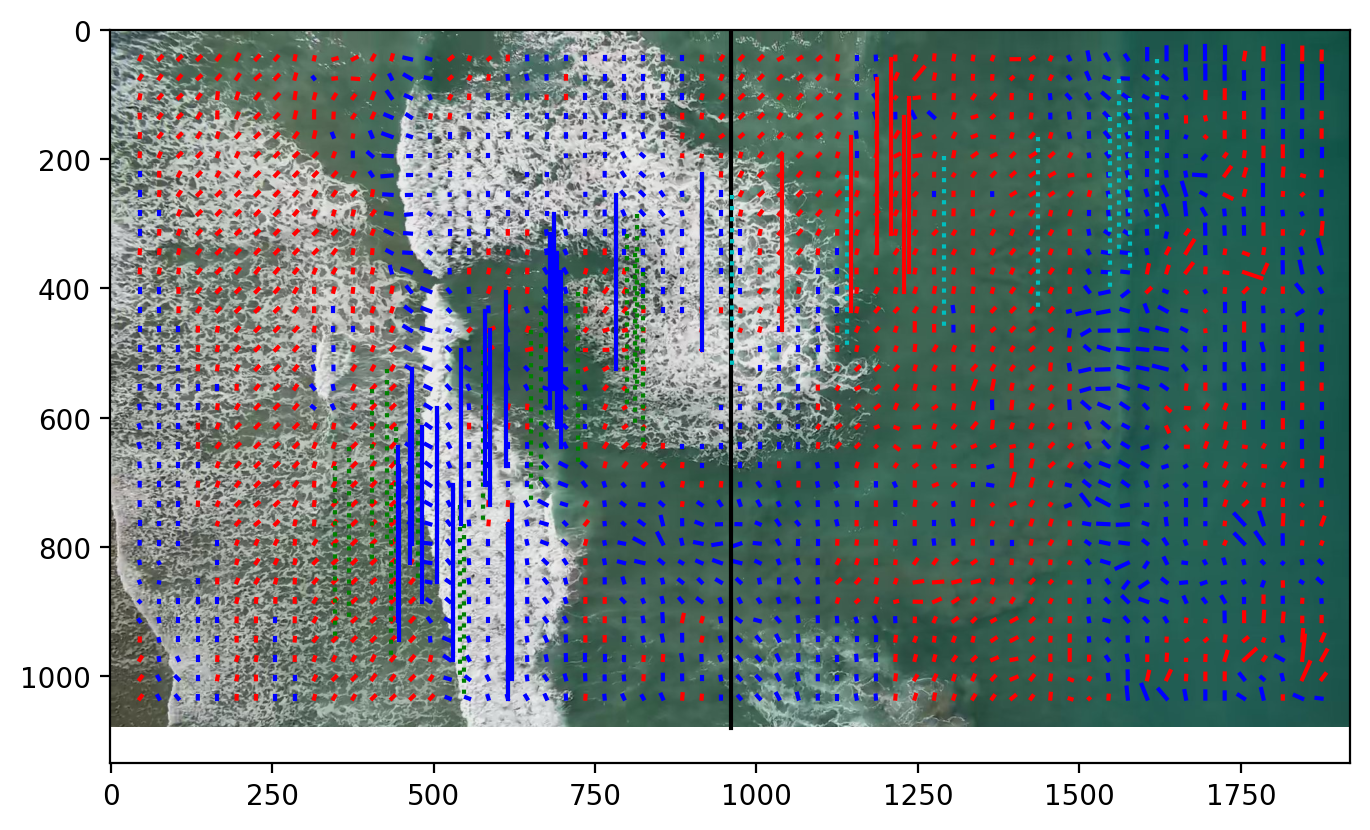

In [129]:
#analyze rip channel current and plot
f=plt.figure(dpi=200)
f.set_figwidth(8)
f.set_figheight(12)

idxFile=0
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
img_ref = mpimg.imread(pathImage + filename) / 256
imgplot_1 = plt.imshow(img_ref)

#draw average DFD vectors
for x in range(windowSpanX, DFDwidth-windowSpanX+1, windowShiftX ):
    for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
        vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vX0=x + searchRange + tileSpan
        vY0=y + searchRange + tileSpan
        #print(vX0, vX0+vX , vY0, vY0+vY)
        if vX>0:
            lineColor='r'
        else:
            lineColor='b'    
        plt.plot([vX0, vX0+4*vX], [vY0, vY0+4*(vY-compensateY)], lineColor)

#draw neural flow line
plt.plot([dimX / 2, dimX / 2], [0, dimY], 'k')
#plot rip current value
for i in range(len(ripValue)):
    vY0 = searchRange + tileSpan + windowSpanY + windowShiftY * i
    vY1 = searchRange + tileSpan + windowSpanY + windowShiftY * (i + ripNoRowWindow - 1)
    vX0 = searchRange + tileSpan
    xX1 = dimX - searchRange - tileSpan - windowSpanX
    vXC = dimX / 2 + ripValue[i]*4000
    if ripValue[i]>0:
        lineColor='c'
    else:
        lineColor='g' 
    plt.plot([vXC, vXC], [vY0, vY1], lineColor+":")

#plot rip depth value
for i in range(len(ripValue)):
    vY0 = searchRange + tileSpan + windowSpanY + windowShiftY * i
    vY1 = searchRange + tileSpan + windowSpanY + windowShiftY * (i + ripNoRowWindow - 1)
    vX0 = searchRange + tileSpan
    xX1 = dimX - searchRange - tileSpan - windowSpanX
    vXC = dimX / 2 + ripDepth[i]*4000
    if ripDepth[i]>0:
        lineColor='c'
    else:
        lineColor='g' 
    plt.plot([vXC, vXC], [vY0, vY1], lineColor+"--")
print(i)

#plot rip risk value
for i in range(len(ripValue)):
    vY0 = searchRange + tileSpan + windowSpanY + windowShiftY * i
    vY1 = searchRange + tileSpan + windowSpanY + windowShiftY * (i + ripNoRowWindow - 1)
    vX0 = searchRange + tileSpan
    xX1 = dimX - searchRange - tileSpan - windowSpanX
    vXC = dimX / 2 + ripDepth[i]*4000
    if ripRisk[i]>0:
        lineColor='r'
    else:
        lineColor='b' 
    plt.plot([vXC, vXC], [vY0, vY1], lineColor)
print(i)


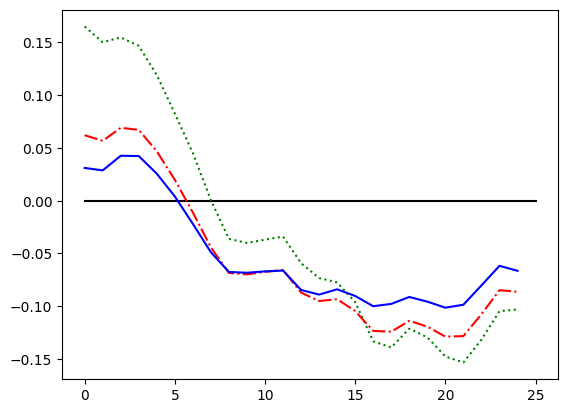

In [120]:
#plot net rip channel current
plt.plot([])
plt.plot([0,len(ripRisk)], [0,0], 'k')
plt.plot(ripValue, 'g:')
plt.plot(ripDepth, 'r-.')
plt.plot(ripRisk, 'b')

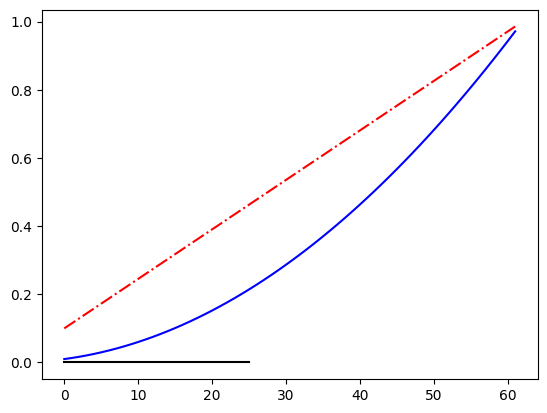

In [130]:
#plot depth and risk model
plt.plot([])
plt.plot([0,len(ripRisk)], [0,0], 'k')
#plt.plot(ripValue, 'g:')
plt.plot(oceanDepthSlice, 'r-.')
plt.plot(oceanRiskSlice, 'b')